# BIODIVERSITY IN NATIONAL PARKS

### INTRODUCTION

A data analysis report focusing on the conservation status of endangered species in USA’s National Parks with the aim to investigate patters, which could indicate why certain species become endangered.

It is widely understood that numerous human activities contribute to species becoming threatened. Typically, there are multiple causes at play that include “habitat destruction, fragmentation, and degradation, pollution, introduction of non-native species, disease, climate change, and over-exploitation”.  <a link = https://www.nature.com/scitable/knowledge/library/saving-endangered-species-a-case-study-using-19445898>[1]</a>

National Parks are well-protected landscapes that contain forested areas, water sources, and seashores. Their function is to help sustain and recover at-risk species of plants and animals in order to prevent their extinction. “At-risk species include those listed under the Endangered Species Act; state-, locally-, and tribal-listed species; and other native species that are of special management concern including rare, declining, sensitive, endemic, or unique species.” <a link = https://www.nps.gov/subjects/rareandendangered/index.htm>[2]</a>

[1] “Saving Endangered Species: A Case Study Using Global Amphibian Declines”, Croteau, E. & Mott, C. L. (2011) Saving Endangered Species: A Case Study Using Global Amphibian Declines. Nature Education Knowledge 4(4):9;<br>
[2] The National Park Service, U.S. Department of the Interior.

### SCOPE

#### <u>GOALS</u>

1. Identify themes and patterns that correlate with whether certain species of animals and plants become extinct.

#### <u>ACTIONS</u>

1. Use the findings to inform further research into current human-driven animal and plant extinction issues.

#### <u>DATA</u>

- There are 4 columns in the “species” dataframe, containing 5,824 samples.

``` python
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object 
    
unique categories: ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'] 
number of unique scientific names: 5541 
number of unique common names:  5504
unique conservations status: [NaN, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'] 
```

- Some unique scientific names are repeated more than once under different common names:<br><br>

    - There are 265 unique scientific names that have 2 entries with different common name entires;
    - There are 9 unique scientific names that have 3 entries with different common name entries.

  For some of those repeat cases, the convservation status is different, while for others, only the common name is different. Where the conservation status does not change but only the common name is different, those entries are treated as duplicates and are removed.<br><br>
  
-  There are missing fields in the "species" dataframe in conservation status column, denoted as NaN. Out of 5,824 samples, there are only 191 samples that have a non-NaN conservation status recorded. Of those 191, 11 are removed as duplicates, leaving 180 samples. There are no missing fields in any other column.<br><br>
  
- There are 3 columns in the “observations” dataframe, containing 23,296 samples.

``` python
scientific_name    object
park_name          object
observations        int64
dtype: object 

number of unique scientific names:  5541
unique park names: ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']
```
- In the "observations" dataframe, there is typically only 1 observation entry for each unique National Park. For some species, however, there are multiple entries of observations for each National Park:<br><br>

    - There are 5,267 unique species with only 4 recorded observations (1 for each unique national park); 
    - There are 265 unique species with 8 recorded observations;
    - There are 9 unique species with 12 recorded observations.<br>

  For those species with multiple observations per unique National Park, it could be that those observations were made at different time periods and can provide insight into how certain populations are growing or declining over time. However, there is no timestamp for any observation, nor is there any indication whether repeat observations for a given National Park include the previously counted animals/ plants.<br>

  Moreover, the species that have 12 observations recorded (3 for each National Park) are those that were listed under 3 different common names in the 'species' dataframe.<br><br>

- There are no missing fields in any column of the "observations" dataframe.

#### <u>ANALYSIS</u>

1.1 Bar chart of species in each category;<br>
1.2 Bar chart of species in each category that have a conservation status;<br>
1.3 Proportion of species with a conservation status to the total number of listed species in each category;<br>
2.1 Bar chart of unique species in each category by conservation status;<br>
2.2 As 2.1 but stacked for better visuals;<br>
3.1 Pie chart of proportions of each conservation status;<br>
4.1, 4.2, 4.3, 4.4 Box plot distributions of species observations for each conservation status in each national park.

### CONCLUSIONS
- The analysis of the 180 animals with a recorded conservation status indicates that while there are more Mammals labeled as ‘endangered’, Fish are more likely than Mammals to be ‘endangered’, with 27.3% of species that are Fish being labeled as ‘endangered’. Meanwhile, only 19.4% of species in the Mammals category have the ‘endangered’ status.<br><br>

- For the ‘threatened’ status, the Fish has the greatest number of species being labeled as such, while also being the category where animals are most likely to be labeled ‘threatened’ (36.4%). This is followed in second place by Amphibians, where 28.6% of Amphibians are ‘threatened’.<br><br>

- The Bird, Vascular Plant, and Mammal categories, all have relatively high numbers of ‘species of concern’. Yet, Nonvascular Plants and Reptiles have a 100% of their animals labeled as such. Vascular Plants have 93.5% of their species, and Bird have 90.7% of the species labeled as ‘species of concern’.<br><br>

- Birds have the greatest number and most likelihood of species being ‘in recovery’.<br><br>

- Overall, it could be said that Fish is the most affected category, having the highest likelihood of animals being ‘endangered’ or ‘threatened’. Mammals are also badly affected, having the highest raw number of species with the ‘endangered’ status. Birds have the highest proportion of ‘species of concern’ animals of all the categories, followed by Vascular Plants and Mammals in second and third places respectively.

### DATA EXPLORATION

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('species_info.csv', delimiter = ',')
observations = pd.read_csv('observations.csv', delimiter = ',')

In [3]:
print(species.head(), '\n\n')
print(species.dtypes, '\n\n')
print('species dataframe length:', len(species))
print('unique conservations status: ', len(species.conservation_status.unique()))
print('number of NaN conservation status: ', len(species) - len(species[
                                                  (species.conservation_status == 'Species of Concern')
                                                | (species.conservation_status == 'Endangered')
                                                | (species.conservation_status ==  'Threatened')
                                                | (species.conservation_status ==  'In Recovery')
                                                                       ]))
print('unique categories: ', len(species.category.unique()))
print('unique scientific names: ', len(species.scientific_name.unique()))
print('unique common names: ', len(species.common_names.unique()), '\n\n')

print(observations.head(), '\n\n')
print(observations.dtypes, '\n\n')
print('observations datframe length: ', len(observations))
print('unique park names: ', observations.park_name.unique())
print('unique scientific names: ', len(observations.scientific_name.unique()))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   


category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object 


species dataframe length: 5824
unique conservations status:  5
number of NaN conservation status:  5633
unique categories:  7
unique scient

### DATA TIDYING & MANIPULATION

In [4]:
#SPECIES DATAFRAME:

def unique_scientific_names_count(dataframe, name):
    print('DATAFRAME: ', name, '\n\n')
    
    print('COUNTING REPEAT ENTRIES:', '\n')
    
    unique_scientific_names = dataframe.scientific_name.unique()
    names_count = {}
    for name in unique_scientific_names:
        names_count[name] = 0

    for i in range(len(dataframe)):
        names_count[dataframe.scientific_name[i]] += 1

    #unique scientific names with count of 2:
    non_unique_2 = 0
    for name_count in names_count.items():
        if name_count[1] == 2:
            #print(name_count)
            non_unique_2 += 1
    print('Unique scientific names with 2 observation entries for the same name: ', non_unique_2)

    #unique scientific names with count of 3:
    non_unique_3 = 0
    for name_count in names_count.items():
        if name_count[1] == 3:
            print(name_count)
            non_unique_3 += 1
    print('Unique scientific names with 3 observation entries for the same name: ', non_unique_3)

        #unique scientific names with count of 4:
    non_unique_4 = 0
    for name_count in names_count.items():
        if name_count[1] == 4:
            #print(name_count)
            non_unique_4 += 1
    print('Unique scientific names with 4 observation entries for the same name: ', non_unique_4)

    #unique scientific names with count of 8:
    non_unique_8 = 0
    for name_count in names_count.items():
        if name_count[1] == 8:
            #print(name_count)
            non_unique_8 += 1     
    print('Unique scientific names with 8 observation entries for the same name: ', non_unique_8)
    
    #unique scientific names with count of 12:
    non_unique_12 = 0
    for name_count in names_count.items():
        if name_count[1] == 12:
            print(name_count)
            non_unique_12 += 1
    print('Unique scientific names with 12 observation entries for the same name: ', non_unique_12, '\n\n')

unique_scientific_names_count(species, 'SPECIES')

#for i in range(len(species.scientific_name)):
#    if species.scientific_name[i] == 'Streptopelia decaocto':
#        print(species.loc[i], '\n\n')

print('ORIGINAL SPECIES.head():', '\n')
print(species.head(), '\n\n')

#dropping duplicates but keeping those that have different conservation_status (give 2 scientific_name samples
#with 2 differnt conservations_status entries):
species_no_duplicates = species.drop_duplicates(subset = ['scientific_name', 'conservation_status'])

#fillna:
print('FILL NaN:', '\n')
species_no_duplicates_fillna = species_no_duplicates.fillna('None', inplace = False)
print(species_no_duplicates_fillna.head(), '\n\n')

#dropping NaN:
species_no_duplicates_dropna = species_no_duplicates.dropna().reset_index()

#grouping by:
print('GROUP BY CATEGORY:', '\n')
groupby_species_1 = species_no_duplicates_dropna.groupby(['category']).scientific_name.count().reset_index()
print(groupby_species_1.head(20), '\n\n')

print('GROUP BY CATEGORY + STATUS:', '\n')
groupby_species_2 = species_no_duplicates.groupby(['category',
                                                   'conservation_status']).scientific_name.count().reset_index()
print(groupby_species_2.head(20), '\n\n')

print('PIVOTED:', '\n')
groupby_species_2_pivoted = groupby_species_2.pivot(index = 'category', columns = 'conservation_status',
                                                    values = 'scientific_name').reset_index()

groupby_species_2_pivoted.columns = ['category', 'Endangered', 'In Recovery',
                                     'Species of Concern', 'Threatened']
print(groupby_species_2_pivoted.head(20), '\n\n')

print('PIVOTED + REORDERED:', '\n')
groupby_species_2_pivoted_reordered = pd.DataFrame([groupby_species_2_pivoted.iloc[4],
                                                    groupby_species_2_pivoted.iloc[5],
                                                    groupby_species_2_pivoted.iloc[0],
                                                    groupby_species_2_pivoted.iloc[2],
                                                    groupby_species_2_pivoted.iloc[3],
                                                    groupby_species_2_pivoted.iloc[6],
                                                    groupby_species_2_pivoted.iloc[1]],
                                                   columns = ['category', 'Endangered', 'In Recovery',
                                                             'Species of Concern', 'Threatened'])
print(groupby_species_2_pivoted_reordered, '\n\n')

print('GROUP BY STATUS:', '\n')
groupby_species_3 = species_no_duplicates.groupby(['conservation_status']).scientific_name.count().reset_index()
print(groupby_species_3, '\n\n')

print('REORDERED:', '\n')
groupby_species_3_reordered = pd.DataFrame([groupby_species_3.iloc[1],
                                            groupby_species_3.iloc[2],
                                            groupby_species_3.iloc[3],
                                            groupby_species_3.iloc[0]],
                                           columns = ['conservation_status', 'scientific_name'])
print(groupby_species_3_reordered)

DATAFRAME:  SPECIES 


COUNTING REPEAT ENTRIES: 

Unique scientific names with 2 observation entries for the same name:  265
('Canis lupus', 3)
('Puma concolor', 3)
('Procyon lotor', 3)
('Myotis lucifugus', 3)
('Castor canadensis', 3)
('Columba livia', 3)
('Hypochaeris radicata', 3)
('Holcus lanatus', 3)
('Streptopelia decaocto', 3)
Unique scientific names with 3 observation entries for the same name:  9
Unique scientific names with 4 observation entries for the same name:  0
Unique scientific names with 8 observation entries for the same name:  0
Unique scientific names with 12 observation entries for the same name:  0 


ORIGINAL SPECIES.head(): 

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_statu

In [5]:
# OBSERVATIONS DATAFRAME:

unique_scientific_names_count(observations, 'OBSERVATIONS')

#for i in range(len(observations.scientific_name)):
#    if observations.scientific_name[i] == 'Puma concolor':
#        print(observations.loc[i], '\n\n')

print('ORIGINAL OBSERVATIONS.head():', '\n')
print(observations.head(), '\n\n')

#grouping by:
print('GROUP BY NAME + PARK:', '\n')
groupby_observations_1 = observations.groupby(['scientific_name',
                                               'park_name']).observations.mean().reset_index()
print(groupby_observations_1.head(20), '\n\n')
#print(groupby_observations_1[groupby_observations_1.scientific_name == 'Canis lupus'], '\n\n')

print('GROUP BY NAME:', '\n')
groupby_observations_2 = observations.groupby(['scientific_name']).observations.mean().reset_index()
print(groupby_observations_2.head(20), '\n\n')

print('GROUP BY PARK:', '\n')
groupby_observations_3 = observations.groupby(['park_name']).observations.sum().reset_index()
print(groupby_observations_3, '\n\n')

#pivoting:
print('PIVOTED:', '\n')
groupby_observations_1_pivoted = groupby_observations_1.pivot(index = 'scientific_name',
                                                              columns = 'park_name',
                                                              values = 'observations').reset_index()
groupby_observations_1_pivoted.columns = ['scientific_name', 'bryce', 'great_smoky_mountains',
                                        'yellowstone', 'yosemite']

#dropping two more duplicates of scientific_name from "species" that have different conservation_status
#keeping the latest conservation status:
species_no_duplicates_2 = species_no_duplicates.drop_duplicates(subset = ['scientific_name']).reset_index()
print(groupby_observations_1_pivoted.head(20), '\n\n')

#merging species and observations tables + dropping useless columns:
print('MERGED SPECIES + OBSERVATIONS PIVOTED:', '\n')
merged_df = species_no_duplicates_2.merge(groupby_observations_1_pivoted).drop(columns = ['index', 'common_names'])
print(merged_df.head(20), '\n')

print('MERGED NON-PIVOTED + FILL NaN:', '\n')
merged_df_2 = species_no_duplicates_2.merge(groupby_observations_2).drop(columns = ['index', 'common_names'])
merged_df_2.fillna('None', inplace = True)
print(merged_df_2.head(20), '\n')

#grouping merged_df_2:
print('MERGED + GROUP BY CATEGORY:', '\n')
merged_df_2_groupby_category = merged_df_2.groupby(['category']).observations.mean().reset_index()
print(merged_df_2_groupby_category, '\n\n')

print('MERGED + GROUP BY CATEROGY + STATUS:', '\n')
merged_df_2_groupby_category_status = merged_df_2.groupby(['category',
                                                           'conservation_status']).observations.mean().reset_index()
print(merged_df_2_groupby_category_status, '\n\n')

DATAFRAME:  OBSERVATIONS 


COUNTING REPEAT ENTRIES: 

Unique scientific names with 2 observation entries for the same name:  0
Unique scientific names with 3 observation entries for the same name:  0
Unique scientific names with 4 observation entries for the same name:  5267
Unique scientific names with 8 observation entries for the same name:  265
('Puma concolor', 12)
('Hypochaeris radicata', 12)
('Castor canadensis', 12)
('Canis lupus', 12)
('Myotis lucifugus', 12)
('Streptopelia decaocto', 12)
('Columba livia', 12)
('Procyon lotor', 12)
('Holcus lanatus', 12)
Unique scientific names with 12 observation entries for the same name:  9 


ORIGINAL OBSERVATIONS.head(): 

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3   

### VISUALISING DATA

#### <u>Visualising the number of unique species listed in the DataFrames</u>

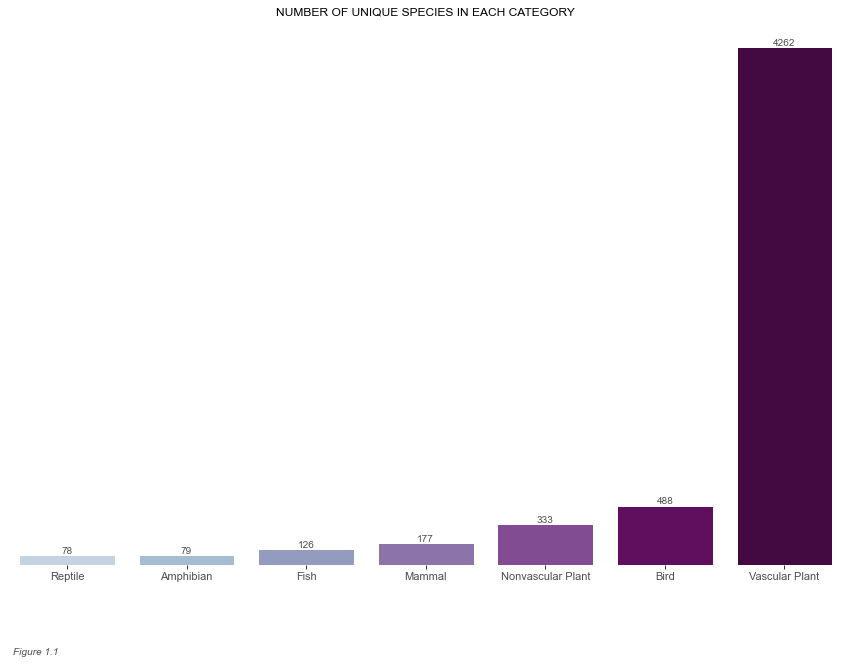

In [6]:
def species_by_category():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    sns.countplot(x = 'category', data = species_no_duplicates,
                  order = species_no_duplicates['category'].value_counts(ascending = True).index,
                  palette = ['#bfd3e6', '#9ebcda', '#8c96c6', '#8c6bb1', '#88419d', '#6e016b', '#4d004b'])
    
    sns.despine(bottom = True, left = True)
    
    plt.title('NUMBER OF UNIQUE SPECIES IN EACH CATEGORY')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks([], [])
    
    for p in ax.patches:
        ax.text(x = p.get_x() + p.get_width() / 2, y = p.get_height() + 10,
                s = '{:.0f}'.format(p.get_height()), ha = 'center', color = '#4f4e4e')
    
    plt.figtext(0.13, 0.0, 'Figure 1.1', fontsize = 10, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()

species_by_category()


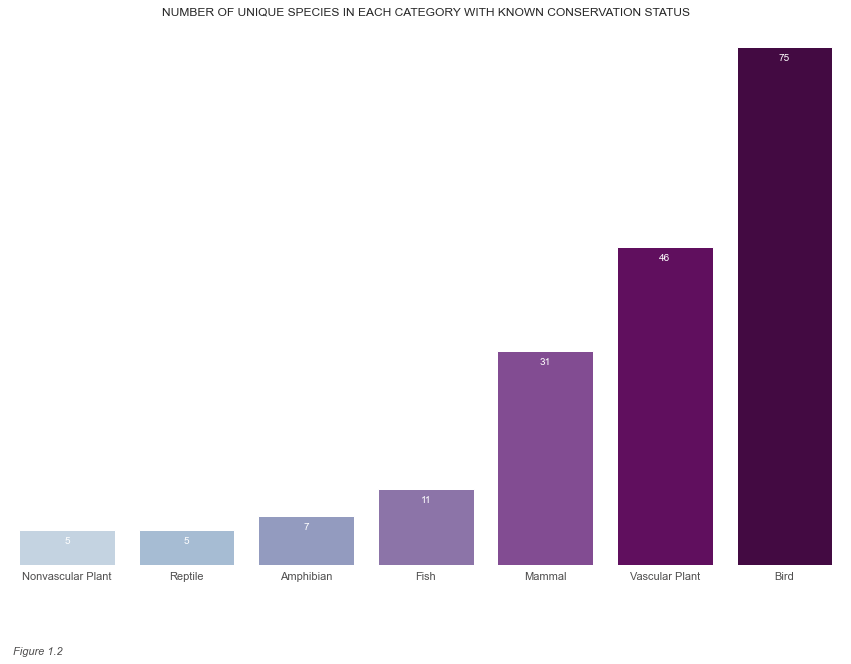

In [7]:
def species_by_category_dropna():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    sns.countplot(x = 'category', data = species_no_duplicates_dropna,
                  order = species_no_duplicates_dropna['category'].value_counts(ascending = True).index,
                  palette = ['#bfd3e6', '#9ebcda', '#8c96c6', '#8c6bb1', '#88419d', '#6e016b', '#4d004b'])
    
    sns.despine(bottom = True, left = True)
    
    plt.title('NUMBER OF UNIQUE SPECIES IN EACH CATEGORY WITH KNOWN CONSERVATION STATUS')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks([], [])
    
    for p in ax.patches:
        ax.text(x = p.get_x() + p.get_width() / 2, y = p.get_height() - 2,
                s = '{:.0f}'.format(p.get_height()), ha = 'center', color = 'w')
    
    plt.figtext(0.13, 0.0, 'Figure 1.2', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()

species_by_category_dropna()


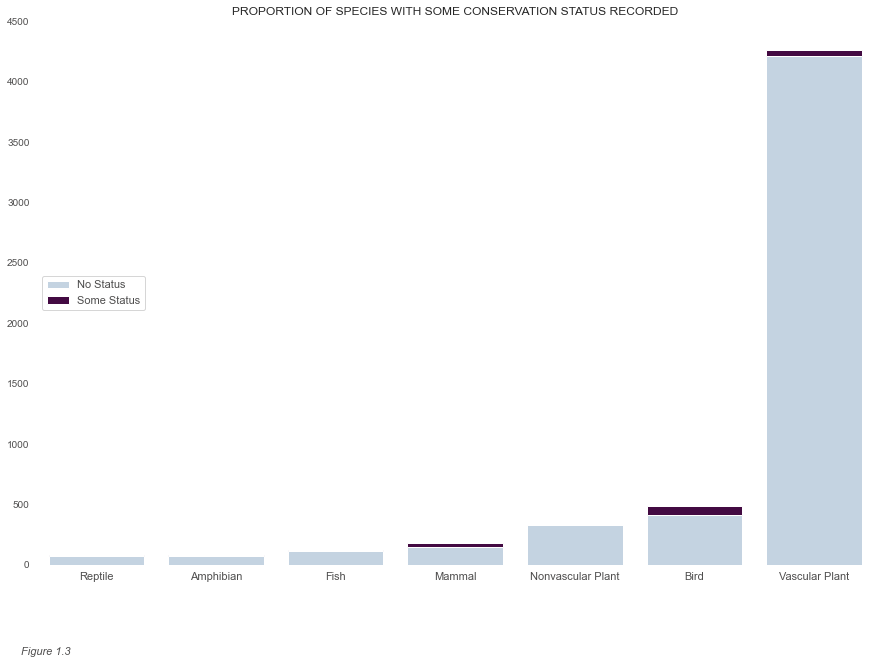

In [8]:
def species_by_category_stacked():
    f, ax = plt.subplots(figsize = (15, 10))

    sns.set_style('white')
    
    data_1 = species_no_duplicates_fillna[species_no_duplicates_fillna.conservation_status == 'None']
    data_2 = species_no_duplicates_dropna
    bottom = data_1.groupby(['category']).scientific_name.count().reset_index().scientific_name
    bottom_reordered = pd.DataFrame([bottom.iloc[0],
                                     bottom.iloc[5],
                                     bottom.iloc[2],
                                     bottom.iloc[3],
                                     bottom.iloc[4],
                                     bottom.iloc[1],
                                     bottom.iloc[6]],
                                     columns = ['scientific_name']).scientific_name

    sns.countplot(x = 'category', data = data_1, color = '#bfd3e6',
                  order = species_no_duplicates['category'].value_counts(ascending = True).index)
    sns.countplot(x = 'category', data = data_2, color = '#4d004b', bottom = bottom_reordered,
                  order = species_no_duplicates['category'].value_counts(ascending = True).index)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('PROPORTION OF SPECIES WITH SOME CONSERVATION STATUS RECORDED')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks(range(0, 4501, 500), color = '#4f4e4e')

    plt.figtext(0.11, 0.0, 'Figure 1.3', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.legend(['No Status', 'Some Status'], loc = 6, fontsize = 11, labelcolor = '#4f4e4e')
    
    plt.show()

species_by_category_stacked()

IGNORE THIS FIGURE. USE 2.2 INSTEAD


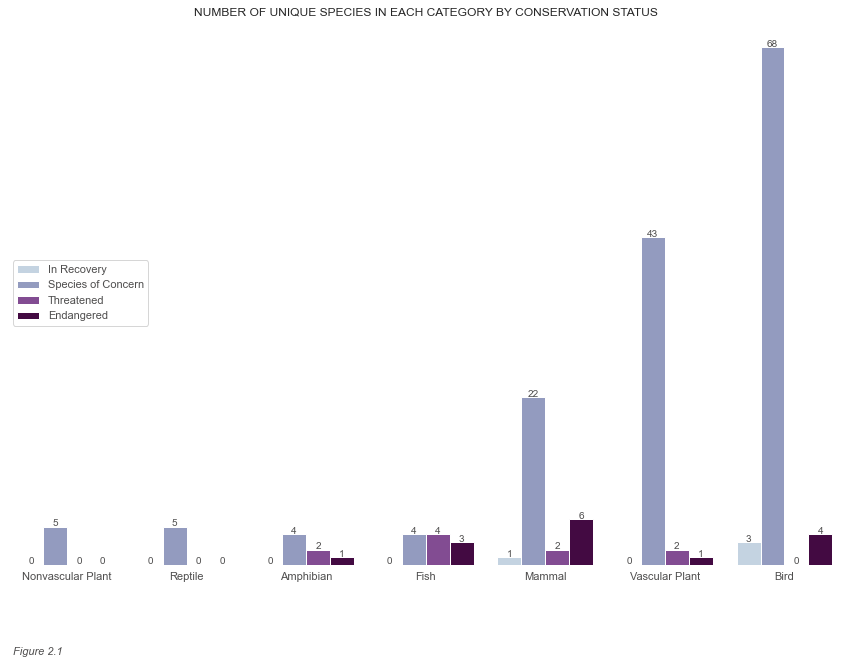

In [9]:
print('IGNORE THIS FIGURE. USE 2.2 INSTEAD')
def category_by_conservation_status():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    sns.countplot(x = 'category', hue = 'conservation_status', data = species_no_duplicates,
                  order = species_no_duplicates_dropna['category'].value_counts(ascending = True).index,
                  hue_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'],
                  palette = ['#bfd3e6', '#8c96c6', '#88419d', '#4d004b'])
    
    sns.despine(bottom = True, left = True)
    
    plt.title('NUMBER OF UNIQUE SPECIES IN EACH CATEGORY BY CONSERVATION STATUS')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks([], [])
    
    # NOTE: some of the patches have 0 height, resulting in p.get_height() returning 0
    # so percent = ((height)/(len(df))) * 100 line would return a ValueError (dividing by zero there)
    # hence the if/else statement to get around this:
    for p in ax.patches:
        if float(p.get_height()) > 0:
            height = p.get_height()
        else:
            height = .00000001
        ax.text(x = p.get_x() + p.get_width() / 2, y = height + 0.05,
                s = '{:.0f}'.format(height), ha = 'center', color = '#4f4e4e')
        
    plt.legend(fontsize = 11, loc = 6, labelcolor = '#4f4e4e')
    
    plt.figtext(0.13, 0.0, 'Figure 2.1', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()

category_by_conservation_status()


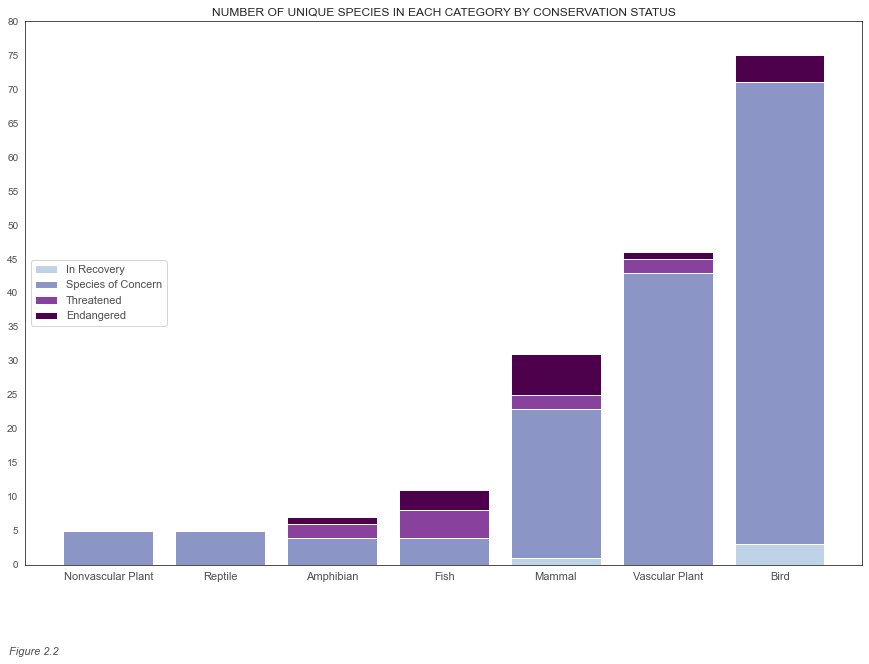

In [10]:
def category_by_conservation_status_stacked():
    bottom_2 = np.array([number if number > 0 else 0 
                         for number in groupby_species_2_pivoted_reordered['In Recovery']])
    bottom_3 = np.array([number if number > 0 else 0 
                         for number in groupby_species_2_pivoted_reordered['Species of Concern']])
    bottom_4 = np.array([number if number > 0 else 0 
                         for number in groupby_species_2_pivoted_reordered['Threatened']])

    f, ax = plt.subplots(figsize = (15, 10))
    plt.ylim(0, 80)

    sns.set_style('whitegrid')
    
    plt.bar(x = 'category', height = 'In Recovery', data = groupby_species_2_pivoted_reordered,
            color = '#bfd3e6')
    plt.bar(x = 'category', height = 'Species of Concern', data = groupby_species_2_pivoted_reordered,
            bottom = bottom_2, color = '#8c96c6')
    plt.bar(x = 'category', height = 'Threatened', data = groupby_species_2_pivoted_reordered,
            bottom = (bottom_2 + bottom_3), color = '#88419d')
    plt.bar(x = 'category', height = 'Endangered', data = groupby_species_2_pivoted_reordered,
            bottom = (bottom_2 + bottom_3 + bottom_4), color = '#4d004b')
    
    sns.despine(top = False, right = False)
    
    plt.title('NUMBER OF UNIQUE SPECIES IN EACH CATEGORY BY CONSERVATION STATUS')
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks(range(0, 81, 5), color = '#4f4e4e')

    plt.figtext(0.11, 0.0, 'Figure 2.2', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.legend(['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], loc = 6, fontsize = 11,
               labelcolor = '#4f4e4e')
    
    plt.show()

category_by_conservation_status_stacked()


#### <u>Visualising the proportion unique species listed under a certain conservation status</u>

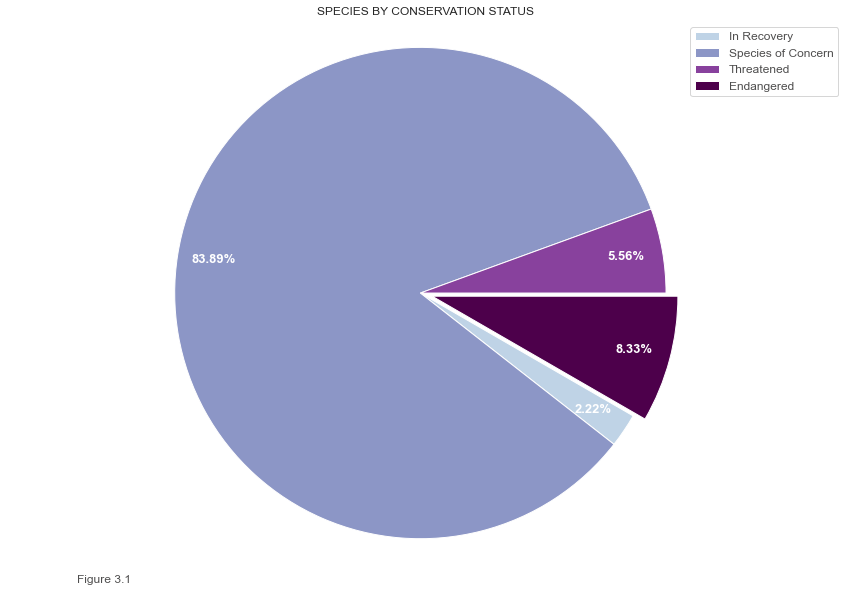

In [11]:
def conservation_status_proportions():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    wedges, text, autotexts = ax.pie(groupby_species_3_reordered['scientific_name'], autopct = '%.2f%%',
                                     pctdistance = 0.85, colors = ['#bfd3e6', '#8c96c6', '#88419d', '#4d004b'],
                                     explode = [0, 0, 0, 0.05], counterclock = False, startangle = -30)
    
    plt.setp(autotexts, size = 13, color = 'w', weight = "bold")

    plt.axis('equal')
    
    plt.title('SPECIES BY CONSERVATION STATUS')
    
    ax.legend(wedges, groupby_species_3_reordered['conservation_status'], fontsize = 12, labelcolor = '#4f4e4e')
    
    plt.figtext(0.19, 0.10, 'Figure 3.1', fontsize = 12, color = '#4f4e4e')
    plt.show()

conservation_status_proportions()


#### <u>Visualising distributions of species by conservation status in each National Park</u>

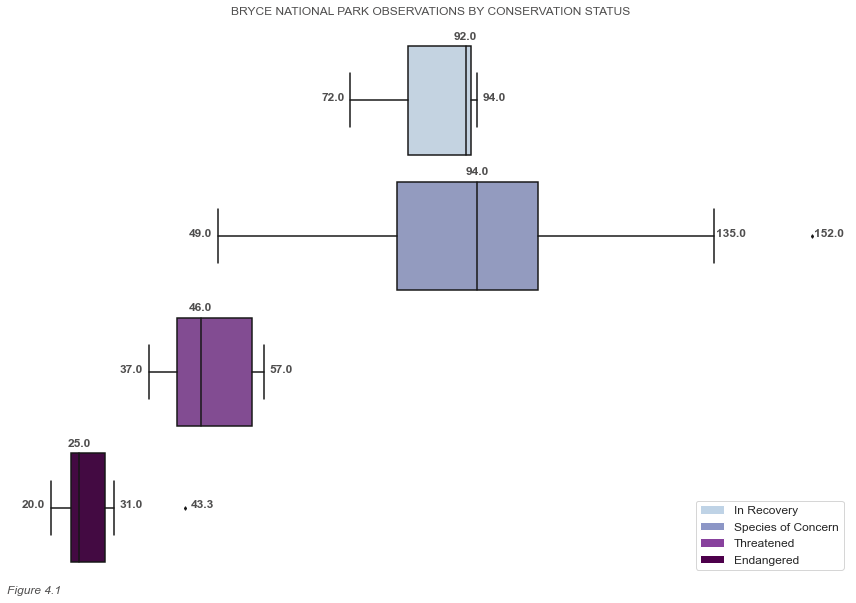

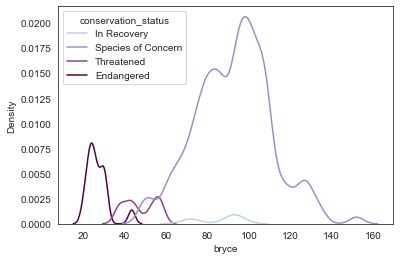

In [23]:
import matplotlib.patches as mpatches

labels = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']

def legend_generator():
    class AnyObjectHandler1:
        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            patch1 = mpatches.Rectangle([x0, y0], width, height, facecolor = '#bfd3e6',
                                        transform = handlebox.get_transform())
            handlebox.add_artist(patch1)
            return patch1
        
    class AnyObjectHandler2:
        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            patch2 = mpatches.Rectangle([x0, y0], width, height, facecolor = '#8c96c6',
                                        transform = handlebox.get_transform())
            handlebox.add_artist(patch2)
            return patch2
        
    class AnyObjectHandler3:
        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            patch3 = mpatches.Rectangle([x0, y0], width, height, facecolor = '#88419d',
                                       transform = handlebox.get_transform())
            handlebox.add_artist(patch3)
            
            return patch3

    class AnyObjectHandler4:
        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            patch4 = mpatches.Rectangle([x0, y0], width, height, facecolor = '#4d004b',
                                       transform = handlebox.get_transform())
            handlebox.add_artist(patch4)
            
            return patch4

    plots = ['plot0', 'plot1', 'plot2', 'plot3']
    return plt.legend([plots[0], plots[1], plots[2], plots[3]],
               labels, handler_map = {plots[0]: AnyObjectHandler1(),
                                      plots[1]: AnyObjectHandler2(),
                                      plots[2]: AnyObjectHandler3(),
                                      plots[3]: AnyObjectHandler4()}, fontsize = 12, loc = 4)

def num_observations_by_conservations_status_bryce():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    select_data = merged_df[(merged_df.conservation_status == 'In Recovery')
                     | (merged_df.conservation_status == 'Species of Concern')
                     | (merged_df.conservation_status == 'Threatened')
                     | (merged_df.conservation_status == 'Endangered')]
    colors = ['#bfd3e6', '#8c96c6', '#88419d', '#4d004b']
    
    plot = sns.boxplot(y = 'conservation_status', x = 'bryce', data = select_data, orient = 'h',
                order = labels, palette = colors, fliersize = 2.5)
    
    plt.yticks([], [])
    plt.xticks([],[])
    
    sns.despine(bottom = True, left = True)
    
    plt.title('BRYCE NATIONAL PARK OBSERVATIONS BY CONSERVATION STATUS\n', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    #legend:
    legend_generator()
    
    #text anatations:
    mins = []
    for label in labels:
        min_val = select_data[select_data.conservation_status == label].bryce.min()
        mins.append(min_val)
    for i in range(4):
        plt.text(x = mins[i] - 3, y = i, s = mins[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
        
    maxs = []
    for label in labels:
        max_val = round(select_data[select_data.conservation_status == label].bryce.max(), 1)
        maxs.append(max_val)
    for i in range(4):
        plt.text(x = maxs[i] + 3, y = i, s = maxs[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')

    medians = []
    for label in labels:
        median_val = round(select_data[select_data.conservation_status == label].bryce.median(), 1)
        medians.append(median_val)
    for i in range(4):
        plt.text(x = medians[i], y = i - 0.45, s = medians[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
    
    additional_points = []
    new_max_concern = sorted(list(select_data[select_data.conservation_status == 'Species of Concern'].bryce))[-2]
    new_max_endangered = sorted(list(select_data[select_data.conservation_status == 'Endangered'].bryce))[-2]
    additional_points.append(new_max_concern)
    additional_points.append(new_max_endangered)

    plt.text(x = additional_points[0] + 3, y = 1, s = additional_points[0],
             horizontalalignment = 'center', size = 12, color = '#4f4e4e', weight = 'semibold')
    plt.text(x = additional_points[1] + 3, y = 3, s = additional_points[1],
             horizontalalignment = 'center', size = 12, color = '#4f4e4e', weight = 'semibold')

    plt.figtext(0.12, 0.1, 'Figure 4.1', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()
    
    #additional plot to visualise distributions
    plt.close('all')
    plot = sns.kdeplot(x = 'bryce', data = select_data, hue = 'conservation_status',
                       hue_order = labels, palette = colors, bw_adjust = 0.5)

num_observations_by_conservations_status_bryce()

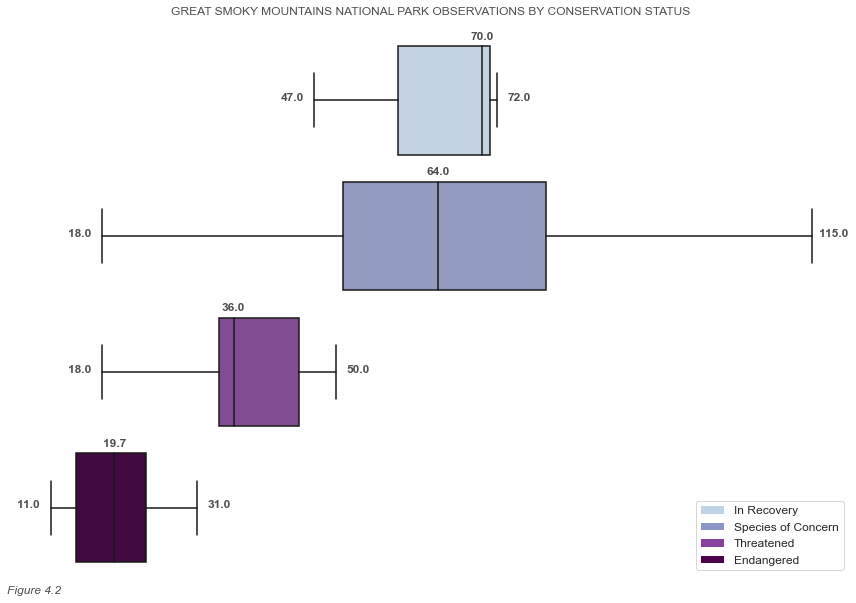

In [13]:
def num_observations_by_conservations_status_great_smoky():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    select_data = merged_df[(merged_df.conservation_status == 'In Recovery')
                     | (merged_df.conservation_status == 'Species of Concern')
                     | (merged_df.conservation_status == 'Threatened')
                     | (merged_df.conservation_status == 'Endangered')]
    labels = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
    colors = ['#bfd3e6', '#8c96c6', '#88419d', '#4d004b']
    
    plot = sns.boxplot(y = 'conservation_status', x = 'great_smoky_mountains', data = select_data, orient = 'h',
                order = labels, palette = colors, fliersize = 2.5)
    
    plt.yticks([], [])
    plt.xticks([],[])
    
    sns.despine(bottom = True, left = True)
    
    plt.title('GREAT SMOKY MOUNTAINS NATIONAL PARK OBSERVATIONS BY CONSERVATION STATUS\n', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    #legend:
    legend_generator()
    
    #text anatations:
    mins = []
    for label in labels:
        min_val = select_data[select_data.conservation_status == label].great_smoky_mountains.min()
        mins.append(min_val)
    for i in range(4):
        plt.text(x = mins[i] - 3, y = i, s = mins[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
        
    maxs = []
    for label in labels:
        max_val = round(select_data[select_data.conservation_status == label].great_smoky_mountains.max(), 1)
        maxs.append(max_val)
    for i in range(4):
        plt.text(x = maxs[i] + 3, y = i, s = maxs[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')

    medians = []
    for label in labels:
        median_val = round(select_data[select_data.conservation_status == label].great_smoky_mountains.median(), 1)
        medians.append(median_val)
    for i in range(4):
        plt.text(x = medians[i], y = i - 0.45, s = medians[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
    
    plt.figtext(0.12, 0.1, 'Figure 4.2', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()
    
num_observations_by_conservations_status_great_smoky()

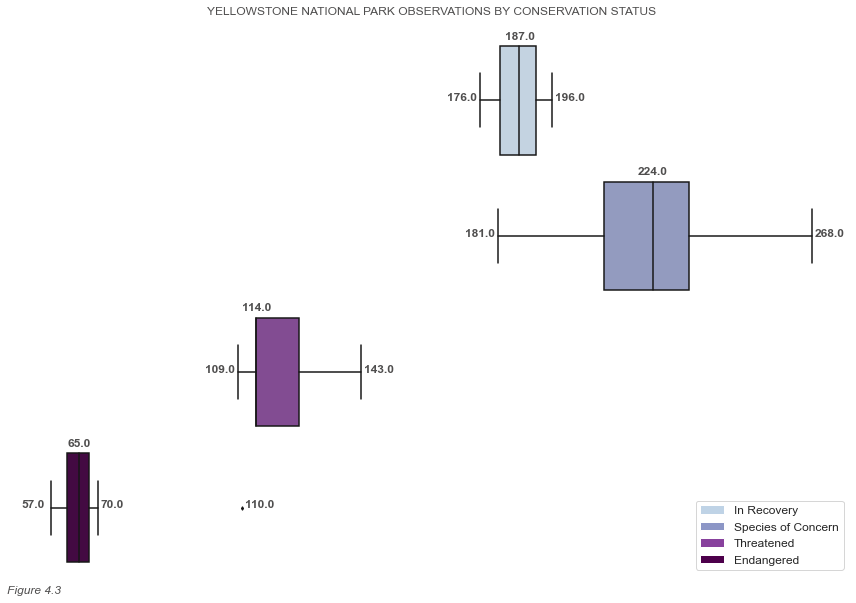

In [14]:
def num_observations_by_conservations_status_yellowstone():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    select_data = merged_df[(merged_df.conservation_status == 'In Recovery')
                     | (merged_df.conservation_status == 'Species of Concern')
                     | (merged_df.conservation_status == 'Threatened')
                     | (merged_df.conservation_status == 'Endangered')]
    labels = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
    colors = ['#bfd3e6', '#8c96c6', '#88419d', '#4d004b']
    
    plot = sns.boxplot(y = 'conservation_status', x = 'yellowstone', data = select_data, orient = 'h',
                order = labels, palette = colors, fliersize = 2.5)
    
    plt.yticks([], [])
    plt.xticks([],[])
    
    sns.despine(bottom = True, left = True)
    
    plt.title('YELLOWSTONE NATIONAL PARK OBSERVATIONS BY CONSERVATION STATUS\n', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    #legend:
    legend_generator()
    
    #text anatations:
    mins = []
    for label in labels:
        min_val = select_data[select_data.conservation_status == label].yellowstone.min()
        mins.append(min_val)
    for i in range(4):
        plt.text(x = mins[i] - 5, y = i, s = mins[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
        
    maxs = []
    for label in labels:
        max_val = round(select_data[select_data.conservation_status == label].yellowstone.max(), 1)
        maxs.append(max_val)
    for i in range(4):
        plt.text(x = maxs[i] + 5, y = i, s = maxs[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')

    medians = []
    for label in labels:
        median_val = round(select_data[select_data.conservation_status == label].yellowstone.median(), 1)
        medians.append(median_val)
    for i in range(4):
        plt.text(x = medians[i], y = i - 0.45, s = medians[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
    
    additional_point = []
    new_max_endangered = sorted(list(select_data[select_data.conservation_status
                                              == 'Endangered'].yellowstone))[-2]
    additional_point.append(new_max_endangered)

    plt.text(x = additional_point[0] + 4, y = 3, s = additional_point[0],
             horizontalalignment = 'center', size = 12, color = '#4f4e4e', weight = 'semibold')
    
    plt.figtext(0.12, 0.1, 'Figure 4.3', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()
    
num_observations_by_conservations_status_yellowstone()

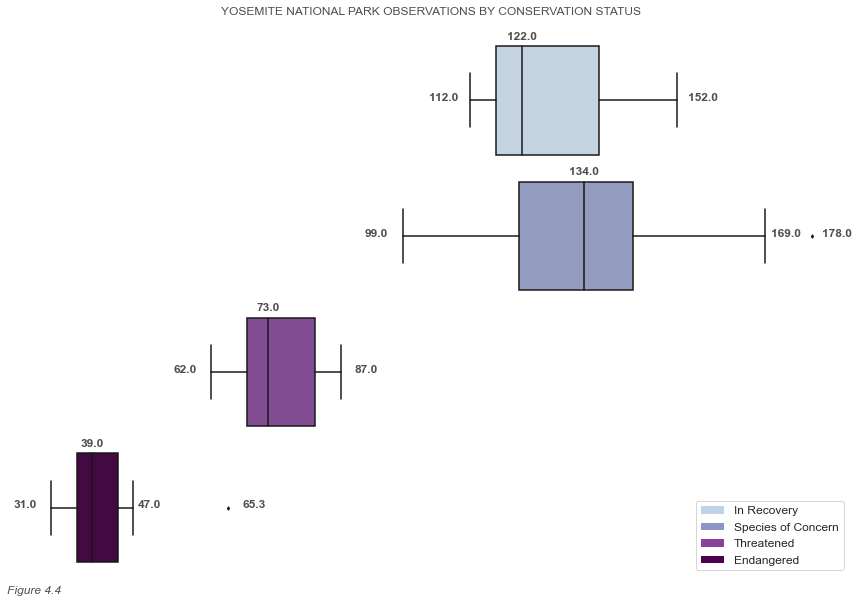

In [15]:
def num_observations_by_conservations_status_yosemite():
    f, ax = plt.subplots(figsize = (15, 10))
    
    sns.set_style('white')
    
    select_data = merged_df[(merged_df.conservation_status == 'In Recovery')
                     | (merged_df.conservation_status == 'Species of Concern')
                     | (merged_df.conservation_status == 'Threatened')
                     | (merged_df.conservation_status == 'Endangered')]
    labels = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
    colors = ['#bfd3e6', '#8c96c6', '#88419d', '#4d004b']
    
    plot = sns.boxplot(y = 'conservation_status', x = 'yosemite', data = select_data, orient = 'h',
                order = labels, palette = colors, fliersize = 2.5)
    
    plt.yticks([], [])
    plt.xticks([],[])
    
    sns.despine(bottom = True, left = True)
    
    plt.title('YOSEMITE NATIONAL PARK OBSERVATIONS BY CONSERVATION STATUS\n', color = '#4f4e4e')
    plt.xlabel('')
    plt.ylabel('')
    
    #legend:
    legend_generator()
    
    #text anatations:
    mins = []
    for label in labels:
        min_val = select_data[select_data.conservation_status == label].yosemite.min()
        mins.append(min_val)
    for i in range(4):
        plt.text(x = mins[i] - 5, y = i, s = mins[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
        
    maxs = []
    for label in labels:
        max_val = round(select_data[select_data.conservation_status == label].yosemite.max(), 1)
        maxs.append(max_val)
    for i in range(4):
        plt.text(x = maxs[i] + 5, y = i, s = maxs[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')

    medians = []
    for label in labels:
        median_val = round(select_data[select_data.conservation_status == label].yosemite.median(), 1)
        medians.append(median_val)
    for i in range(4):
        plt.text(x = medians[i], y = i - 0.45, s = medians[i], horizontalalignment = 'center',
                 size = 12, color = '#4f4e4e', weight = 'semibold')
    
    additional_points = []
    new_max_concern = sorted(list(select_data[select_data.conservation_status
                                              == 'Species of Concern'].yosemite))[-2]
    new_max_endangered = sorted(list(select_data[select_data.conservation_status
                                                 == 'Endangered'].yosemite))[-2]
    additional_points.append(new_max_concern)
    additional_points.append(new_max_endangered)

    plt.text(x = additional_points[0] + 4, y = 1, s = additional_points[0],
             horizontalalignment = 'center', size = 12, color = '#4f4e4e', weight = 'semibold')
    plt.text(x = additional_points[1] + 3, y = 3, s = additional_points[1],
             horizontalalignment = 'center', size = 12, color = '#4f4e4e', weight = 'semibold')
    
    plt.figtext(0.12, 0.1, 'Figure 4.4', fontsize = 12, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()
    
num_observations_by_conservations_status_yosemite()

### DISCUSSION & EVALUATION
- Figure 1.1 shows a bar chart of all the unique species recorded in the dataframes. It can be seen that the vast majority of species in the dataframe are Vascular Plants, while the fewest number of species belong to the categories Reptile and Amphibian.<br><br>

- Of those species that have a recorded conservation status, the largest proportion are Birds, followed by Vascular Plants and Mammals. This can be seen in Figure 1.2. Overall, there are only 180 animals that have a recorded conservation status out of the entire dataframe, which limits the extent to which endangerment and extinction patterns can be identified. Figure 1.3 further highlights this by showing the proportions of species with a known conservation status in each species category. In the case of Reptiles, Amphibians, Fish, and Nonvascular Plans, the proportion is so small, that it cannot be visibly seen on the chart.<br><br>

- Figures 2.2 further splits the species categories by conservation status. The Mammals category has the largest proportion of ‘endangered’ unique species (6 species), followed by Bird (4 species) and Fish (3 species). A small amount of ‘endangered’ unique species belong to the Amphibian and Vascular Plant category (1 species each). Overall, there are 15 different ‘endangered’ unique species recorded in the data.<br>

 Fish have 4 species labeled as ‘threatened’, while Mammals, Amphibians, and Vascular Plants each have 2 species with this label.<br>

 The vast majority of animals are labeled as ‘species of concern’. The largest proportion belongs to the Bird category (68 species), followed by Vascular Plants (43 species), and Mammal (22 species). All categories have of animals have their largest proportion labeled as ‘species of concern’.<br>

 A small proportion of animals are labeled as ‘in recovery’. The belong to the Bird category (3 species) and Mammal category (1 species). None of other categories represent animals with this status.<br><br>

- Figure 3.1 shows a pie chart of all the categories combined, split by conservation status. ‘Species of Concern’ make up 83.89% of the data, while ‘endangered’ and ‘threatened’ account for 8.33% and 5.56% respectively.<br><br>

- Figures 4.1 through 4.4 show box plot distributions of species count , split by conservation status for each National Park. For Bryce National Park (Figure 4.1), the ‘Species of Concern’ status is the most spread out, containing species that have a recorded count ranging from 49 to 135 (152 as outlier). The median count in this category in Bryce National Park is 94. This indicates that there are potentially other factors that contribute to a species being labeled as ‘species of concern’ other than merely the number of observations.<br>

 For the ‘in recovery’ status, the median observation count is lower than for ’species of concern’ at 92, possibly owing to the fact that this category contains much less data.<br>

 The ‘threatened’ and ‘endangered’ status labels have median observation counts of 46 and 25 respectively, with distributions behaving much more predictably than for the other two statuses.<br>

 For the other three National Parks, a similar picture evolves. The ‘species of concern’ distribution is spread out and overlaps the ‘in recovery’ status distribution.<br>

### CONCLUSIONS
- The analysis of the 180 animals with a recorded conservation status indicates that while there are more Mammals labeled as ‘endangered’, Fish are more likely than Mammals to be ‘endangered’, with 27.3% of species that are Fish being labeled as ‘endangered’. Meanwhile, only 19.4% of species in the Mammals category have the ‘endangered’ status.<br><br>

- For the ‘threatened’ status, the Fish has the greatest number of species being labeled as such, while also being the category where animals are most likely to be labeled ‘threatened’ (36.4%). This is followed in second place by Amphibians, where 28.6% of Amphibians are ‘threatened’.<br><br>

- The Bird, Vascular Plant, and Mammal categories, all have relatively high numbers of ‘species of concern’. Yet, Nonvascular Plants and Reptiles have a 100% of their animals labeled as such. Vascular Plants have 93.5% of their species, and Bird have 90.7% of the species labeled as ‘species of concern’.<br><br>

- Birds have the greatest number and most likelihood of species being ‘in recovery’.<br><br>

- Overall, it could be said that Fish is the most affected category, having the highest likelihood of animals being ‘endangered’ or ‘threatened’. Mammals are also badly affected, having the highest raw number of species with the ‘endangered’ status. Birds have the highest proportion of ‘species of concern’ animals of all the categories, followed by Vascular Plants and Mammals in second and third places respectively.